## Standard (Fully Connected) Neural Network

In [1]:
#Use in Markup cell type
#![alt text](imagename.png "Title")  

### Implementing Fully connected Neural Net

#### Loading Required packages and Data

In [2]:
###1. Load Data and Splot Data
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Using TensorFlow backend.


#### Preprocessing

In [3]:
import matplotlib.pyplot as plt
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

<Figure size 2000x400 with 10 Axes>

In [4]:
print("Previous X_train shape: {} \nPrevious Y_train shape:{}".format(X_train.shape, Y_train.shape))
X_train = X_train.reshape(60000, 784)     
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')     
X_test = X_test.astype('float32')     
X_train /= 255    
X_test /= 255
classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)     
Y_test = np_utils.to_categorical(Y_test, classes)
print("New X_train shape: {} \nNew Y_train shape:{}".format(X_train.shape, Y_train.shape))

Previous X_train shape: (60000, 28, 28) 
Previous Y_train shape:(60000,)
New X_train shape: (60000, 784) 
New Y_train shape:(60000, 10)


#### Setting up parameters

In [5]:
input_size = 784
batch_size = 200   
hidden1 = 400
hidden2 = 20
epochs = 2

#### Building the FCN Model

In [6]:
###4.Build the model
model = Sequential()     
model.add(Dense(hidden1, input_dim=input_size, activation='relu'))
# output = relu (dot (W, input) + bias)
model.add(Dense(hidden2, activation='relu'))
model.add(Dense(classes, activation='softmax')) 

# Compilation
model.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='sgd')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_2 (Dense)              (None, 20)                8020      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 322,230
Trainable params: 322,230
Non-trainable params: 0
_________________________________________________________________


#### Training The Model

In [7]:
# Fitting on Data
model.fit(X_train, Y_train, batch_size=batch_size, epochs=10, verbose=2)
###5.Test 

Epoch 1/10
 - 12s - loss: 1.4482 - acc: 0.6251
Epoch 2/10
 - 3s - loss: 0.6239 - acc: 0.8482
Epoch 3/10
 - 3s - loss: 0.4582 - acc: 0.8798
Epoch 4/10
 - 3s - loss: 0.3941 - acc: 0.8936
Epoch 5/10
 - 3s - loss: 0.3579 - acc: 0.9011
Epoch 6/10
 - 4s - loss: 0.3328 - acc: 0.9070
Epoch 7/10
 - 3s - loss: 0.3138 - acc: 0.9118
Epoch 8/10
 - 3s - loss: 0.2980 - acc: 0.9157
Epoch 9/10
 - 3s - loss: 0.2849 - acc: 0.9191
Epoch 10/10
 - 3s - loss: 0.2733 - acc: 0.9223


#### Testing The Model

10000/10000 [==============================] - 1s 121us/step

Test accuracy: 0.9257
[0 6 9 0 1 5 9 7 3 4]


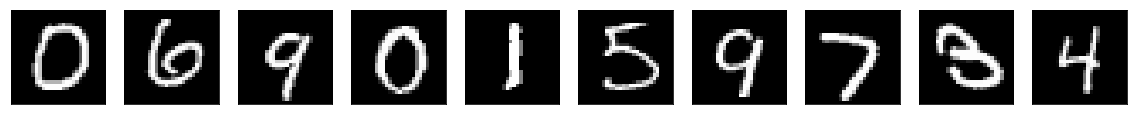

In [8]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1])
mask = range(10,20)
X_valid = X_test[mask]
y_pred = model.predict_classes(X_valid)
print(y_pred)
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()